<a href="https://colab.research.google.com/github/breannashi/Data_Science_Bootcamp/blob/ml-tutorial/ML_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Tutorial - Bioinformatics Bootcamp 2022


## 1.&nbsp;Prerequisite Knowledge and Table of Contents

This course focuses on a machine learning tutorial for people working in bioinformatics. We start with a clean synthetic dataset and apply statistical models in clustering, regression, and classification with sklearn. This tutorial assumes a working knowledge of Python programming, linear algebra with NumPy, and Pandas for data analysis - especially the first two.




##2.&nbsp;Setting up data and packages


The datasets used in this tutorial were found in Kaggle. Kaggle is a website thats useful in finding datasets.

For the clustering and classification sections of this tutorial, we will be using the popular iris dataset. You can upload it using the link below but we will use the preloaded one in sklearn.

https://www.kaggle.com/datasets/himanshunakrani/iris-dataset?resource=download

This dataset gives information about the length and width of the petals and sepals of various iris species. You can use this information to cluster flowers based on these measurements. We can also use this information to classify flowers if the species was unknown.

For the regression section of this tutorial, we will be using the crab age prediction dataset, found here:

https://www.kaggle.com/datasets/sidhus/crab-age-prediction

This dataset has information about crab sex, length, diameter, height, weight, and age. You can use this informaiton to build a regression model to predict a crabs age based on certain parameters given, such as diameter and height.

You can use the links above to download these datasets to use in this tutorial.


In [18]:
#uploading files to colab
from google.colab import files
uploaded = files.upload()
#or use the folder icon on the left

Saving CrabAgePrediction.csv to CrabAgePrediction.csv


In [20]:
#loading files from drive to colab
from google.colab import drive
drive.mount('/content/drive')
#CAUTION: RUN THE GOOGLE DRIVE CELL ONLY AFTER MAKING A COPY OF THE NOTEBOOK IN YOUR OWN GITHUB/DRIVE
#this allows you to interface with your GDrive data using the left folder icon

Mounted at /content/drive


In [ ]:
#imports
from sklearn import datasets #preloaded datasets
from sklearn import metrics #evaluation metrics
from sklearn import model_selection #model setup and hyperparameter tuning
import numpy as np #numerical analysis
import pandas as pd #just in case

#3.&nbsp;Clustering



###3.1&nbsp;Importing the clustering algorithms


In [ ]:
#clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
#as you can see, the writer is a fan of importing particular classes instead 
#of wholesale packages. If you are not from a computing background this is a
#good practice and will save you from frustration as projects get large

###3.2&nbsp;Exploratory Data Analysis

Even in unsupervised projects, data analysis is necessary. Many clustering algorithms are not robust for outlier data - manual analysis will help you with model selection and standardisation. It also helps you contextualise the data and results a little bit more.*italicized text*


In [ ]:
#load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

#explore num features and num samples
print(X.shape[0]) #num samples
print(X.shape[1]) #num features
print(np.unique(y)) #num classes/clusters

#plot histogram of each feature - helps with outliers and shape
import matplotlib.pyplot as plt
for i in range(X.shape[1]):
    plt.hist(X[:,i])
    plt.title(iris.feature_names[i])
    plt.show()

#correlation matrix of features
from seaborn import heatmap
df = pd.DataFrame(X, columns=iris.feature_names)
heatmap(df.corr(), annot=True, cmap='coolwarm')


You can see the sepal distributions are a lot closer to Gaussian and that Sepal width contains a lot of information. Below is the KMeans clustering with three clusters (since we know this beforehand) and with other numbers (since we usually don't know things beforehand). 

**Caution**: Don't make heatmaps like these for large datasets unless you are paying for heavy-duty GPUs

###3.3&nbsp;Modeling and tuning

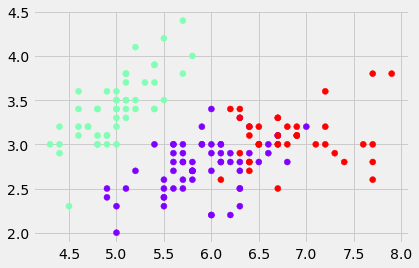

In [13]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')


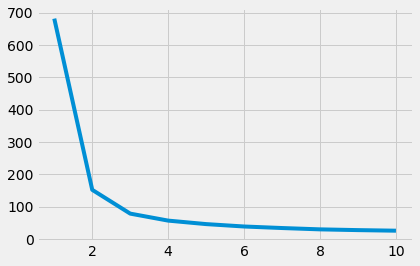

In [12]:
# A list holds the error values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)

What just happened? The first cell visualises the KMeans output for k = 3. We already know that there are three clusters so this works well. But we typically don't know this in unsupervised learning. How do we find the optimal value of this hyperparameter? The dominant method is elbow curve - you plot the error values with different values of k (the number of clusters) and plot the loss. The inflection (or elbow) point is the ideal number that maximises results while avoiding overfitting. 

By the way, how is loss calculated in unspervised learning? For KMeans, we take the sum of squared distances of samples from the centroid of their clusters. If special weights are provided for samples, we can also computer weighted sum. 

Now let's see another evaluation technique for KMeans, the silhouette score. The silhouette score is a comprehensive metric of how close each point in the sample is to other points in the same cluster and how far it is from other clusters. -1 is the worst possible score and 1 is the best. Score increases linearly with performance.

In [14]:
# get silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.5528190123564095

##4&nbsp;Classification

###4.1&nbsp;Importing the Classification Algorithms

In [15]:
#import the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

###4.2&nbsp;Modelling and Tuning

Since we have done exploratory analysis on the same dataset earlier, I will not do it again here. We will build K-nearest neighbours model to classify data. We will have one hyperparameter to tune for performance - k. 


In [ ]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

#instantiate the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

#fit the model to the training data
knn.fit(X_train, y_train)

#make predictions on the test data
y_pred = knn.predict(X_test)

#calculate the accuracy of the model
print(metrics.accuracy_score(y_test, y_pred))

#calculate the f1 score of the model
print(metrics.f1_score(y_test, y_pred, average='weighted'))


In [ ]:
#optimize the model using GridSearchCV
from sklearn.model_selection import GridSearchCV

#set the parameters to test
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]}
#instantiate the GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
#fit the model to the training data
grid.fit(X_train, y_train)

#make predictions on the test data
y_pred = grid.predict(X_test)

#calculate the accuracy of the model
print(metrics.accuracy_score(y_test, y_pred))

#calculate the f1 score of the model
print(metrics.f1_score(y_test, y_pred, average='weighted'))

#display the best parameters
print(grid.best_params_)

Woah, what did I just do there? Unlike the clustering task, classification is a supervised problem. We will need to test our results to optimise performance. So we split the data and labels into training and testing set. We build the model on training set and make predicitons on testing set and compare against the real values we have to determine accuracy and F1 scores (**explain F1 scores**).

To optimise K, we literally just search for some plausible values. For each value, we rebuild and test the model and keep the best one. 


**CAUTION:** GridSearch CV searches through a grid of hyperparameters you feed in. This means it expands combinatorially. Here, for one hyperparameter, we feed 12 plausible values. This means twelve reruns. Most models have two-three and sometimes more hyperparameters and with a bigger range. You can imagine what happens if the plausible range is 1-100 and there are three hyperparameters with a real dataset (1000s to millions of samples). Use RandomisedSearch CV - it trades optimality for massive performance gains.

**Caution:** K-Means has nothing to do with KNN. The K in K-Means is the number of clusters to build while the K in KNN is the number of nearest points to consider when classifying points. 

**Best Practices**

1.   Be cautious of high accuracy or evaluation scores. Unless your dataset is a toy example like above, a 100% accuracy should ring alarm bells.
2.   Everyone thinks they will be careful with using test data. Test data spillage happens more often than you think - sometimes due to bad coding/documenting, sometimes because people do data transformations after splitting. Think of you test data as a clean room. Do all exploration and preprocessing, split immediately before building model, and do not touch test data at all until its time to evaluate. 




##5&nbsp;Regression

We will now use the crab dataset for regression tasks using a random forest model. You can find the data in the repo as 'crab.csv' or download it from the link at the top of this notebook. 

###5.1&nbsp;Importing the Regression and Encoding Algorithms


In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv('CrabAgePrediction.csv')
data.head()

###5.2&nbsp;Preprocessing

This is not a data processing tutorial. Our goal is to work with relatively clean data and show how to do modeling. This is why we start with a Random Forest model which is naturally immune to outliers and many bad data problems. That said, we will do a bit of processing where we convert the Sex Categorical variable into a numerical one. 

Currently it is categorical variable with three values (male, female, indeterminate). We will use one hot encoding to create three binary columns where 1 shows the category as true and 0 as false. Why not convert directly to numbers like 1,2,3? Because ML models have a tendency to learn that 3 > 2. So if male is 3 and female is 2, the model will likely learn male > female in its decision system. - which makes no sense. OneHot encoding avoids this.

In [24]:
#replace Sex column with OneHot encoding of Sex
encoder = OneHotEncoder()
encoder.fit(data[['Sex']]) #encoder computation
data_encoded = encoder.transform(data[['Sex']]) #encoder computation 2

#merging with origninal data
encoded_df = pd.DataFrame(data_encoded.toarray(), columns=encoder.get_feature_names())
data = data.join(encoded_df)

#remove the original column
data.drop('Sex', axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


###5.3&nbsp;Modeling and Tuning


In [25]:
#set age as y and the rest as X
y = data['Age']
X = data.drop('Age', axis=1)
#split data into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

#creating and training a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#predict on test set
y_pred = rf.predict(X_test)

In [26]:
# Import the RandomizedSearchCV class
from sklearn.model_selection import RandomizedSearchCV

# Define the range of values for each hyperparameter
param_dist = {
    'n_estimators': [10, 25, 50],
    'max_depth': [4, 6, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [2, 5, 10],
    'random_state': [42]
}

# Create the RandomizedSearchCV object with the random forest model and parameter distribution
random_search = RandomizedSearchCV(RandomForestRegressor(), param_dist, scoring='neg_mean_squared_error')

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best combination of hyperparameters
print(random_search.best_params_)


{'random_state': 42, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 2, 'max_depth': 10}


In [28]:
#print all scores
print(random_search.cv_results_['mean_test_score'])

#print best score
print(random_search.best_score_)

[-4.85415505 -4.94125076 -4.99602317 -5.36857663 -4.84584726 -4.8724258
 -5.2116685  -5.41593185 -5.43378726 -4.98696253]
-4.845847263494461


As you can see, for regression, we import the random forest regressor, instantiate it, fit, and predict. I think you might be getting the hang of how sklearn models typically work. 

For evaluation and hyperparameter tuning, the regression model is measured using negative mean squared error as a loss metric. The lower this is, the better the model is. 0 is perfect. There are many other loss functions but if you know nothing, use this one.

You might also see that I used Randomized Search instead of Grid Search. This is for demonstration. As noted earlier, this might not be optimal but if you know how to instantiate the parameter grid, you will get really close. Learning the instantiation is honestly a matter of domain experience.